# Day 11: 3D

I've never created a 3D map in Python before!

## Configuration

In [1]:
import os
import pygmt
import matplotlib.pyplot as plt

## PyGMT
PyGMT has a straightforward tutorial on creating 3D maps [here](https://www.pygmt.org/latest/tutorials/3d_perspective_image.html#sphx-glr-tutorials-3d-perspective-image-py).

In [2]:
# Choose location of interest
center = [-49.27068281255774, -73.04356952911888]

# Choose region with buffer around location of interest
buffer = 0.05
region = [center[1]-buffer, center[1]+buffer, center[0]-buffer, center[0]+buffer]

# Load earth relief data for that region
grid = pygmt.datasets.load_earth_relief(resolution="01s", region=region)

grdblend [WARNING]: File @S50W080.earth_relief_15s_p.nc has different increments (0.00416666666667/0.00416666666667) than the output grid (0.000277777777778/0.000277777777778) - must resample
grdblend [WARNING]: File @S50W080.earth_relief_15s_p.nc coordinates are phase-shifted w.r.t. the output grid - must resample
grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -73.0935695291 to -73.0938888889
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -72.9935695291 to -72.9933333333
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from -49.3206828126 to -49.3208333333
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from -49.2206828126 to -49.2202777778


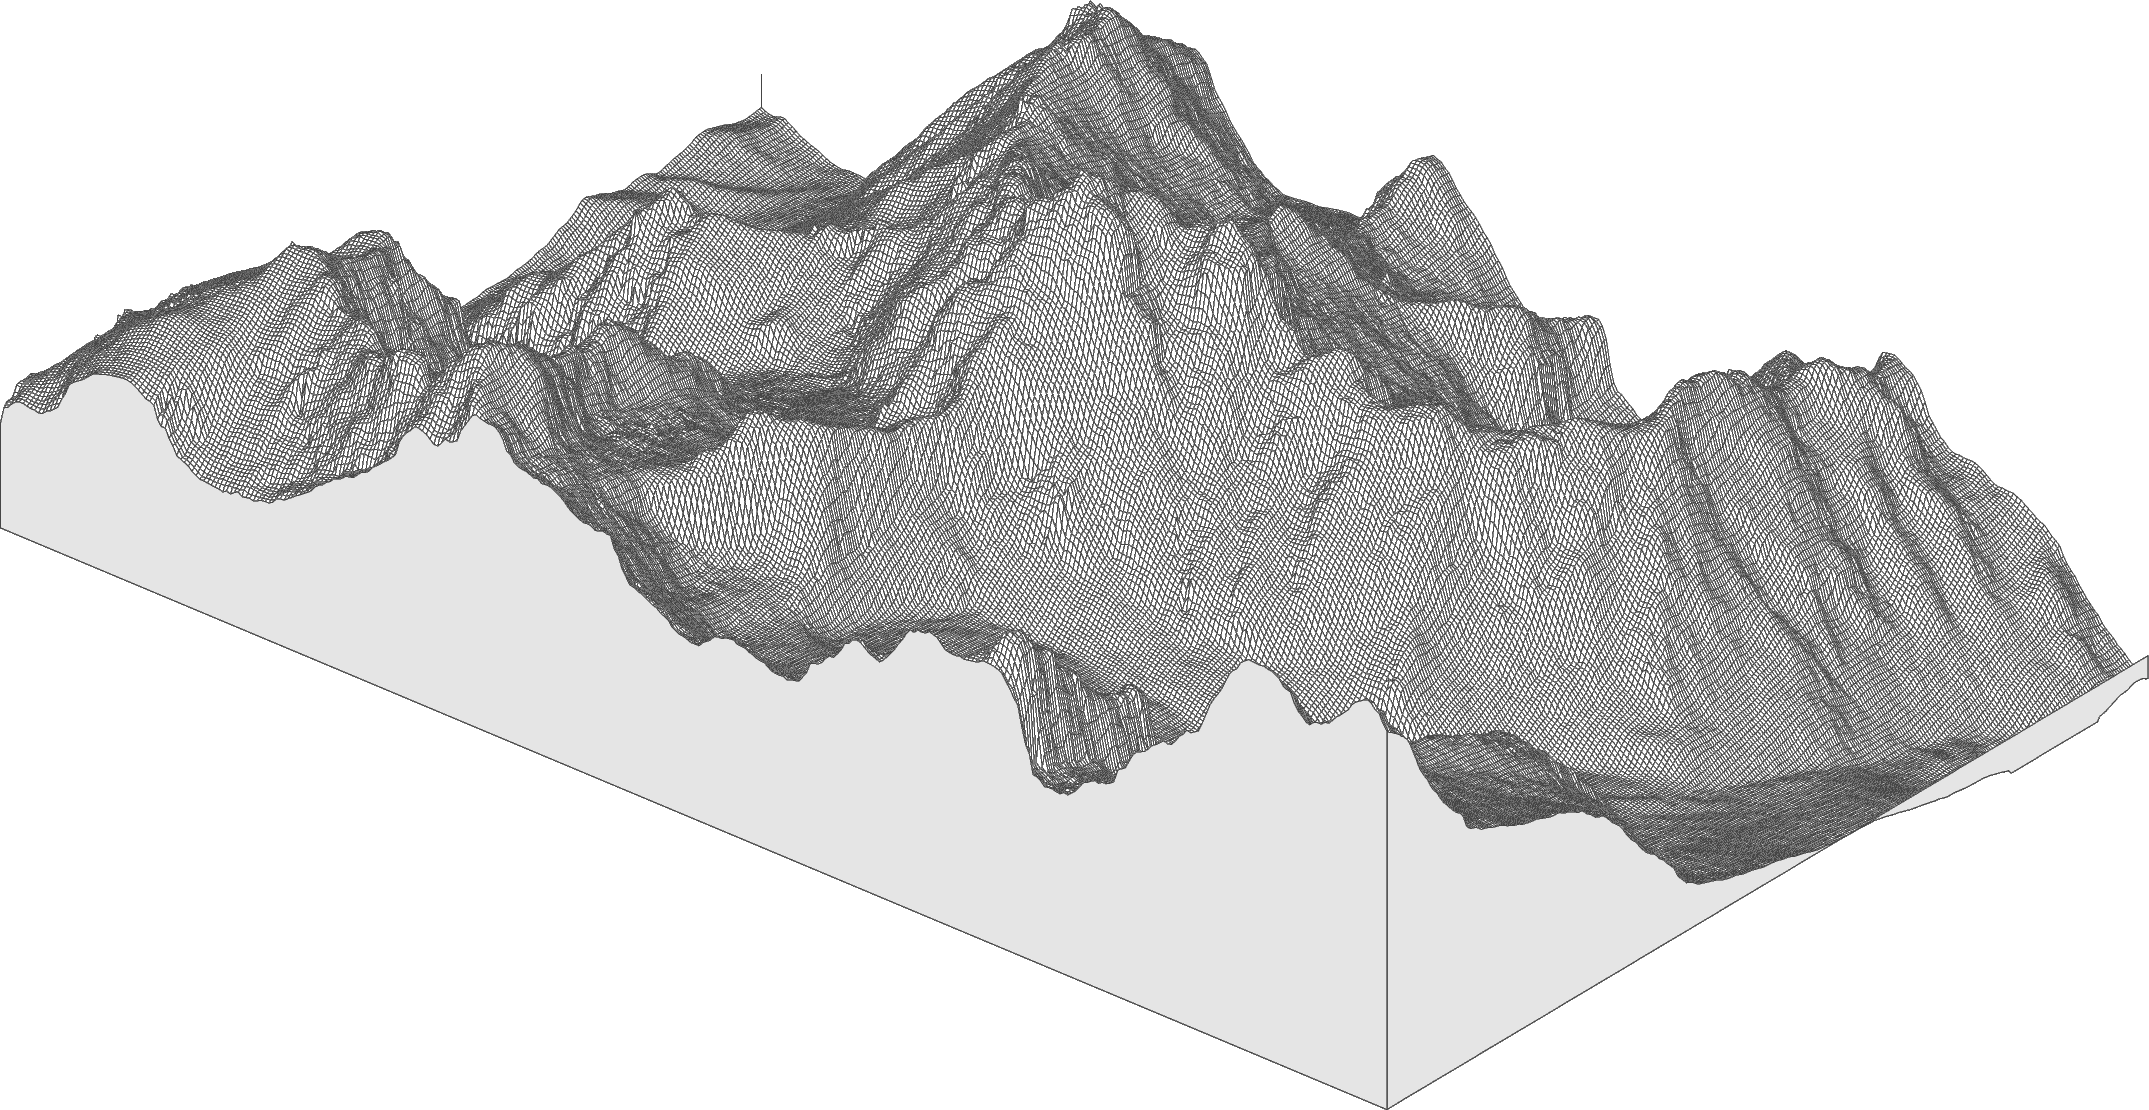

In [3]:
# Construct plot
fig = pygmt.Figure()

# Load terrain
fig.grdview(
    # Elevation data
    grid=grid,
    # Pen formatting
    meshpen = '0.1p,gray27',
    # Azimuth, elevation
    perspective=[-130, 30],
    # Axis labels
    frame=False,
    # Mercator projection, 10cm figure
    projection="M10c",
    # Height dimension 5cm
    zsize="5c",
    # Plane above which to shade in
    plane="800+ggray90",
    facadepen="0.1p,gray27"
)

# Save figure
out_file = "11_3D.png"
out_path = os.path.join("..", "contributions", out_file)
fig.savefig(out_path, dpi=300)

# Preview
fig.show()